# Computer Vision - CNNs for Image Classification

## Dataset: CIFAR10 | Framework: Keras (Tensorflow)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model
from sklearn.model_selection import train_test_split

2025-10-30 19:13:35.194226: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Traning set labels: {y_train.shape}")
print(f"Test set labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Traning set labels: (50000, 1)
Test set labels: (10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

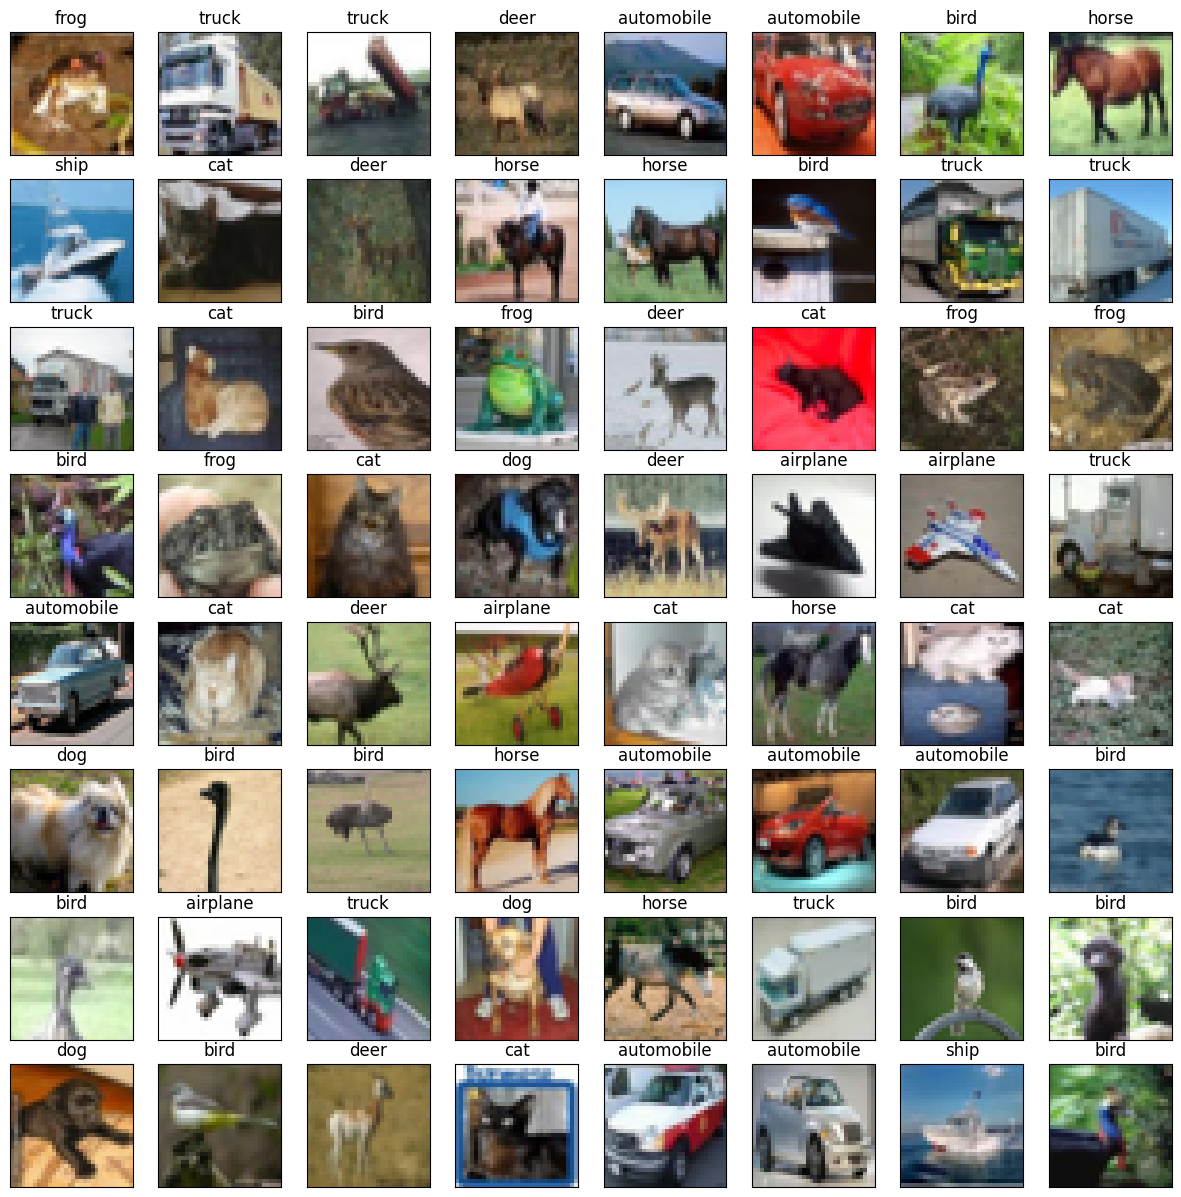

In [5]:
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [26]:
# what is an image?
# X_train[24][0][0]
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [22]:
np.max(X_train), np.min(X_train)

(np.float32(1.0), np.float32(0.0))

In [21]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [24]:
unique, counts = np.unique(y_train, return_counts=True)

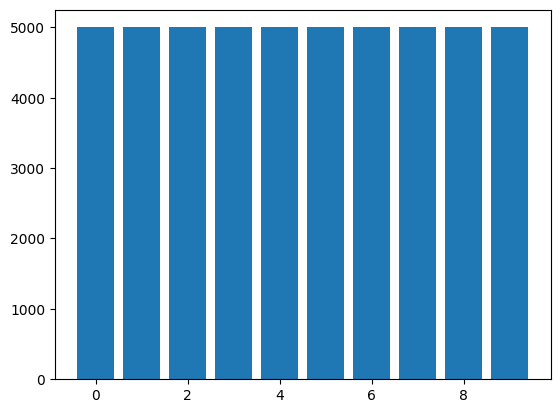

In [25]:
plt.bar(unique, counts)
plt.show()

## 1. MLP for Image Classification

In [27]:
mlp_model = models.Sequential(name="MLP_model")

mlp_model.add(layers.InputLayer(shape=(32, 32, 3)))
mlp_model.add(layers.Flatten())
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

mlp_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp_model.summary()

I0000 00:00:1761835145.396666   24407 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7172 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
mlp_history = mlp_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=256,
                            validation_split=0.1
                            )

Epoch 1/50


2025-10-30 19:41:11.349730: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-30 19:41:11.615020: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_175', 4 bytes spill stores, 4 bytes spill loads

2025-10-30 19:41:12.619663: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_425', 64 bytes spill stores, 64 bytes spill loads

2025-10-30 19:41:12.902406: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_168', 11248 byte

174/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 2.0997

2025-10-30 19:41:15.268195: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-30 19:41:15.624936: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_168', 4 bytes spill stores, 4 bytes spill loads

2025-10-30 19:41:16.248970: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_427', 12 bytes spill stores, 12 bytes spill loads

2025-10-30 19:41:16.332129: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_425', 100 bytes 

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2437 - loss: 2.0980

2025-10-30 19:41:19.716007: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 4 bytes spill stores, 4 bytes spill loads

2025-10-30 19:41:20.523689: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 11760 bytes spill stores, 11096 bytes spill loads



176/176 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.2965 - loss: 1.9500 - val_accuracy: 0.3564 - val_loss: 1.7955
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3869 - loss: 1.7216 - val_accuracy: 0.3980 - val_loss: 1.6840
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4146 - loss: 1.6391 - val_accuracy: 0.4298 - val_loss: 1.6515
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4428 - loss: 1.5636 - val_accuracy: 0.4346 - val_loss: 1.5841
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4576 - loss: 1.5228 - val_accuracy: 0.4522 - val_loss: 1.5311
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4722 - loss: 1.4815 - val_accuracy: 0.4454 - val_loss: 1.5347
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4816 - loss: 1.4503 - val_accuracy: 0.4596 - val_loss: 1.5170
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4904 - loss: 1.4289 - val_accuracy: 0.4696 - va

In [30]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5126 - loss: 1.7786
Test Loss: 1.7786134481430054
Test Accuracy: 0.5126000046730042


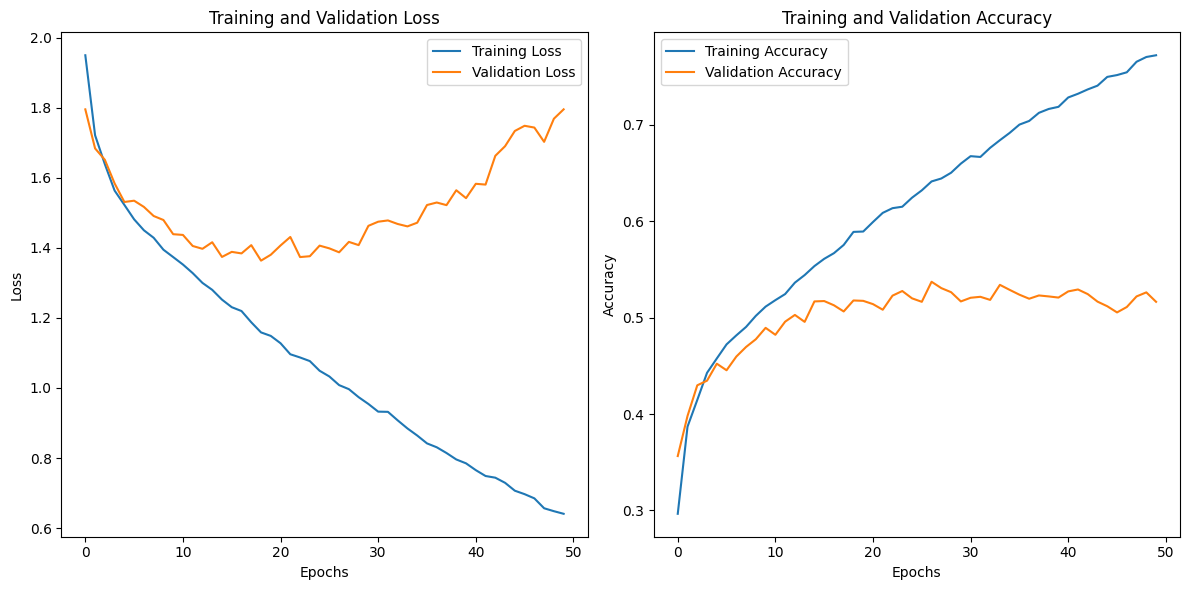

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
predictions_mlp = mlp_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [35]:
np.argmax(predictions_mlp[0])

np.int64(4)

In [36]:
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

In [ ]:
# what are the predictions?
predictions_mlp[0]

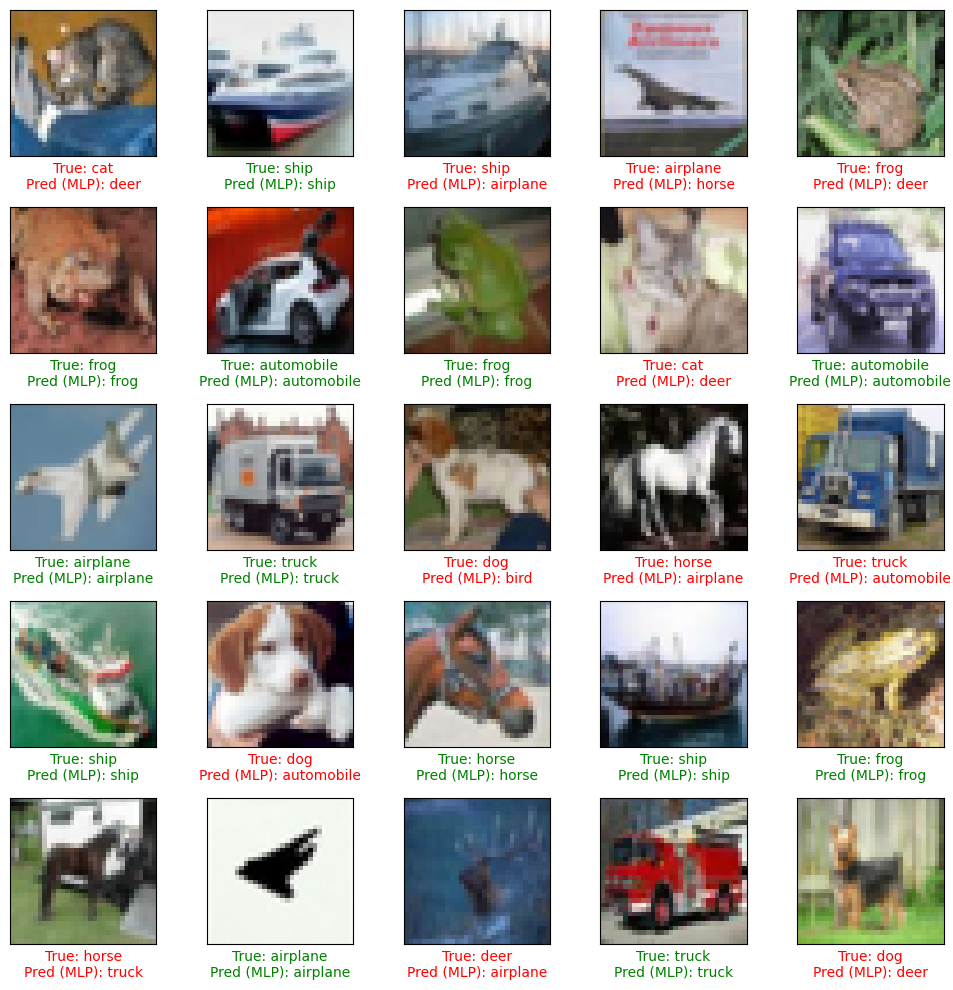

In [37]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]
    if true_label == predicted_label_mlp:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()
plt.show()

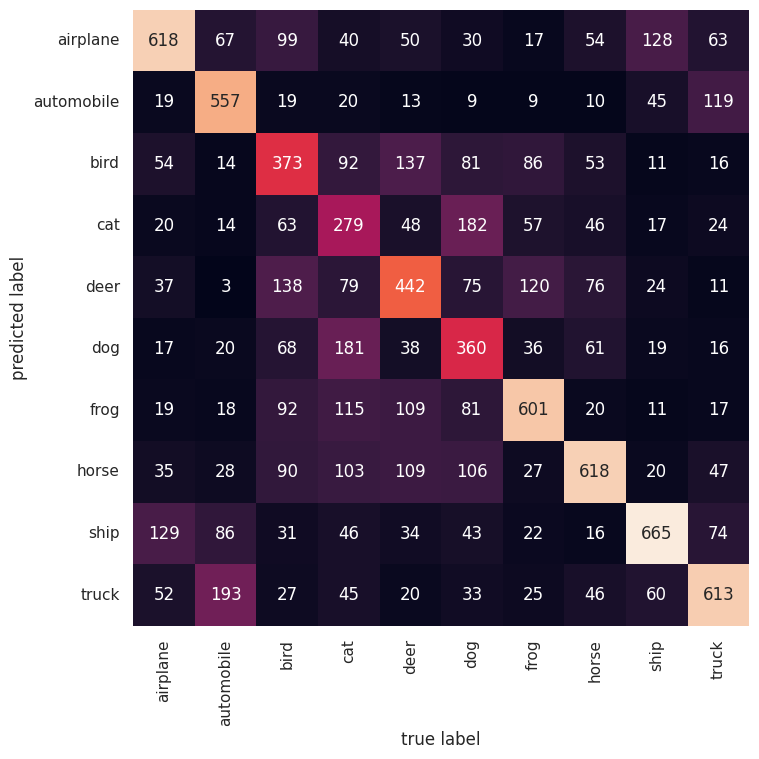

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels_mlp)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [39]:
print(classification_report(y_test, predicted_labels_mlp, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.53      0.62      0.57      1000
  automobile       0.68      0.56      0.61      1000
        bird       0.41      0.37      0.39      1000
         cat       0.37      0.28      0.32      1000
        deer       0.44      0.44      0.44      1000
         dog       0.44      0.36      0.40      1000
        frog       0.55      0.60      0.58      1000
       horse       0.52      0.62      0.57      1000
        ship       0.58      0.67      0.62      1000
       truck       0.55      0.61      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



## 2. CNN for Image Classification

In [40]:
cnn_model = models.Sequential(name="CNN_model")

cnn_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

/home/ai/miniconda3/envs/tfgp12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2201 - loss: 2.0825

2025-10-30 19:59:57.334001: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1217', 4 bytes spill stores, 4 bytes spill loads



176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3025 - loss: 1.8860 - val_accuracy: 0.4784 - val_loss: 1.4705
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4672 - loss: 1.4712 - val_accuracy: 0.5500 - val_loss: 1.2754
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5312 - loss: 1.3135 - val_accuracy: 0.6246 - val_loss: 1.0977
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5715 - loss: 1.2049 - val_accuracy: 0.6484 - val_loss: 1.0016
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6008 - loss: 1.1223 - val_accuracy: 0.6798 - val_loss: 0.9307
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6248 - loss: 1.0576 - val_accuracy: 0.6908 - val_loss: 0.8945
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6425 - loss: 1.0157 - val_accuracy: 0.7070 - val_loss: 0.8504
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6564 - loss: 0.9726 - val_accuracy: 0.72

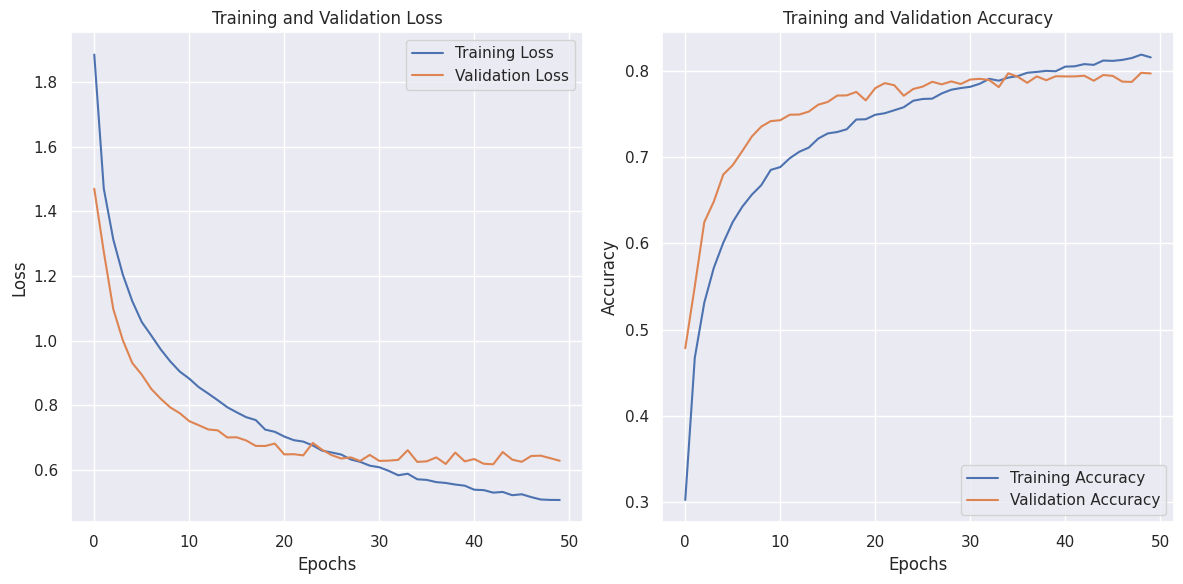

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7819 - loss: 0.6685
Test Loss: 0.6685119271278381
Test Accuracy: 0.7818999886512756


In [44]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


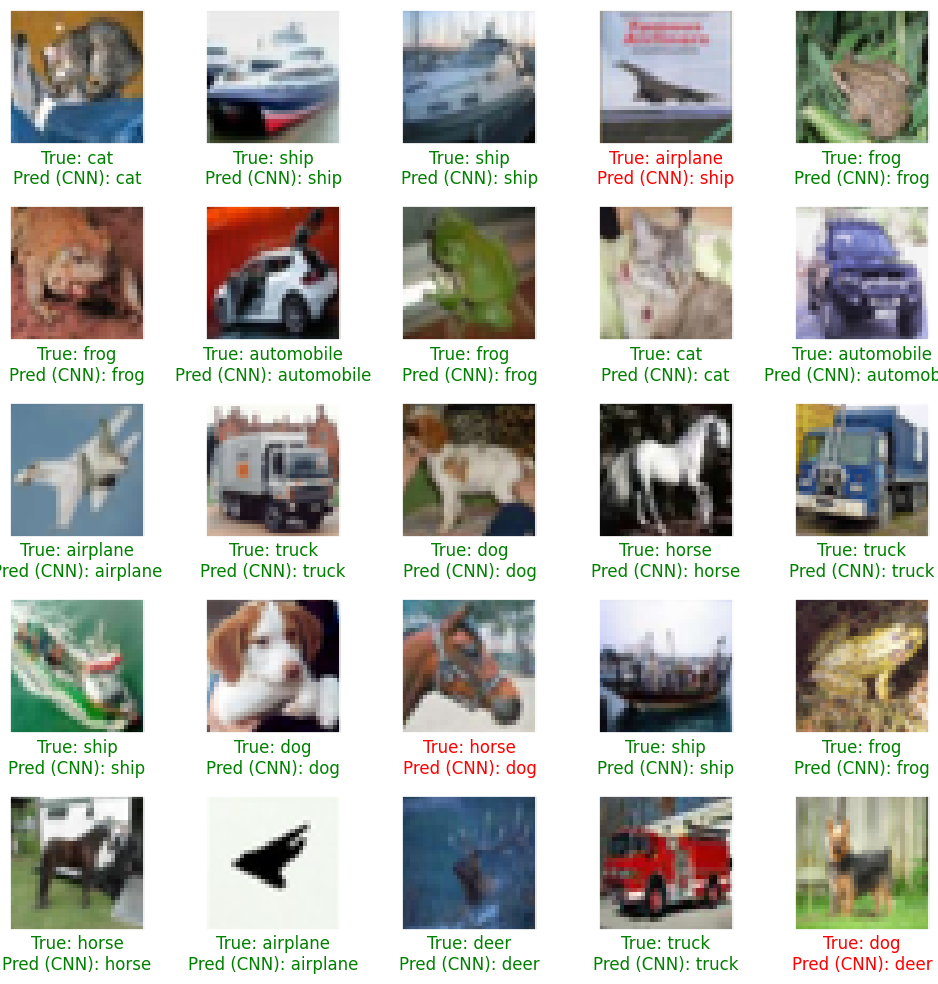

In [45]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

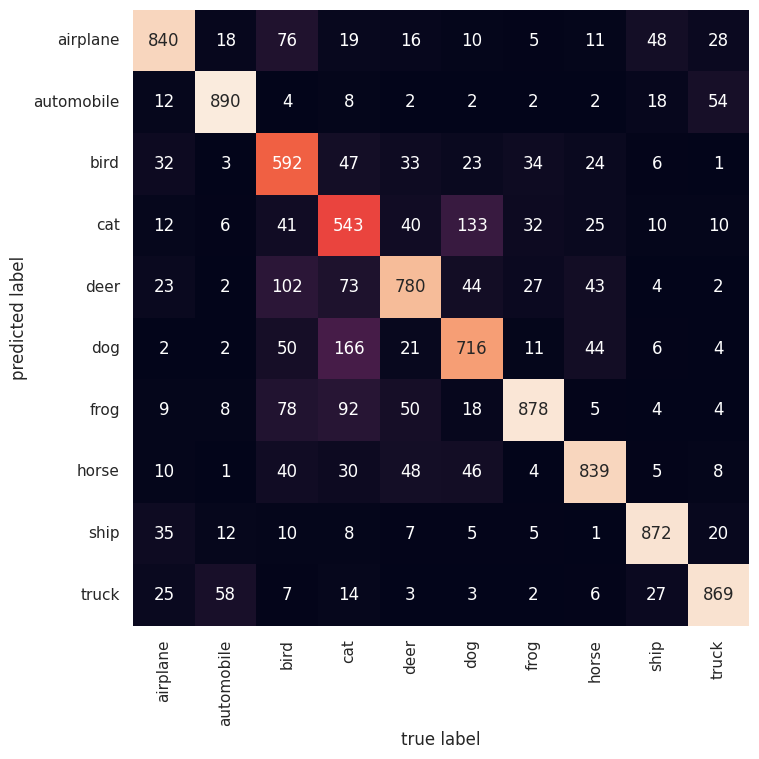

In [46]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [47]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.78      0.84      0.81      1000
  automobile       0.90      0.89      0.89      1000
        bird       0.74      0.59      0.66      1000
         cat       0.64      0.54      0.59      1000
        deer       0.71      0.78      0.74      1000
         dog       0.70      0.72      0.71      1000
        frog       0.77      0.88      0.82      1000
       horse       0.81      0.84      0.83      1000
        ship       0.89      0.87      0.88      1000
       truck       0.86      0.87      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

